# Three-component models
This jupyter program is used to illustrate and compare the three-component models bulit in Sun, Brewin et al. (2023) for estimating size-fractionated phytoplankton size classes (PSCs) from chlorophyll-a concentration (Chl-a) and sea surface temperature (SST), as shown in https://doi.org/10.1016/j.rse.2022.113415.

In this study, we developed one SST-independent model and two SST-dependent three-component models that quantifies the relationship between total Chl-a and Chl-a associated with the three PSCs (pico-, nano- and microplankton). The independent validation results indicate that the SST-dependent models have higher and similar accuracy in estimating PSCs, compared to the SST-independent model. The first SST-dependent model is with logistic functions (Brewin et al., 2017), which is referred to as the 16-parameter model. The second SST-dependent model is with quadratic polynomial function, two-term Gaussian function and logistic functions, which is referred to as the 17-parameter model.

The proposed ecological model, i.e., SST-dependent three-component models, will be at the centre of a new ocean-colour modelling framework, designed for investigating the response of phytoplankton to climate change, described in subsequent parts of this series of papers.

In [1]:
# loading packages
import pandas as pd
import numpy as np
import numpy.matlib
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
# set up Chl-a and SST, where Chl-a ranges from 0.01 to 10 (mg/m3), SST ranges from -1.8 to 35 (celsius degree)
chla = np.logspace(-2.0, 1.0, num=300)
sst = np.arange(-1.8, 35.1, 0.1)

In [4]:
# three-component models, including SST-independent model and SST-dependent models
# SST-independent model (model_a): Equations 6 and 7
model_a_PSCs_Cnp = pd.DataFrame()
model_a_PSCs_Cp = pd.DataFrame()
model_a_PSCs_Cn = pd.DataFrame()
model_a_PSCs_Cm = pd.DataFrame()
model_a_PSCs_Fnp = pd.DataFrame()
model_a_PSCs_Fp = pd.DataFrame()
model_a_PSCs_Fn = pd.DataFrame()
model_a_PSCs_Fm = pd.DataFrame()
# 16-parameter model (model_b): Equations 6-7 and 8-11
model_b_PSCs_Cnp = pd.DataFrame()
model_b_PSCs_Cp = pd.DataFrame()
model_b_PSCs_Cn = pd.DataFrame()
model_b_PSCs_Cm = pd.DataFrame()
model_b_PSCs_Fnp = pd.DataFrame()
model_b_PSCs_Fp = pd.DataFrame()
model_b_PSCs_Fn = pd.DataFrame()
model_b_PSCs_Fm = pd.DataFrame()
# 17-parameter model (model_c): Equations 6-7 and 10-13
model_c_PSCs_Cnp = pd.DataFrame()
model_c_PSCs_Cp = pd.DataFrame()
model_c_PSCs_Cn = pd.DataFrame()
model_c_PSCs_Cm = pd.DataFrame()
model_c_PSCs_Fnp = pd.DataFrame()
model_c_PSCs_Fp = pd.DataFrame()
model_c_PSCs_Fn = pd.DataFrame()
model_c_PSCs_Fm = pd.DataFrame()

In [5]:
# SST-independent model (model_a): Equations 6 and 7
model_a_cnp = np.full((np.size(chla), np.size(sst)), 0.95)
model_a_cp = np.full((np.size(chla), np.size(sst)), 0.17)
model_a_dnp = np.full((np.size(chla), np.size(sst)), 0.87)
model_a_dp = np.full((np.size(chla), np.size(sst)), 0.67)
# size-fractionated concentrations
model_a_PSCs_Cnp = model_a_cnp*(1-np.exp(-model_a_dnp/model_a_cnp*np.matlib.repmat(chla, np.size(sst), 1).T))
model_a_PSCs_Cp = model_a_cp*(1-np.exp(-model_a_dp/model_a_cp*np.matlib.repmat(chla, np.size(sst), 1).T))
model_a_PSCs_Cn = model_a_PSCs_Cnp - model_a_PSCs_Cp
model_a_PSCs_Cm = np.matlib.repmat(chla, np.size(sst), 1).T - model_a_PSCs_Cnp
# size-fractionated fractions
model_a_PSCs_Fnp = model_a_PSCs_Cnp/np.matlib.repmat(chla, np.size(sst), 1).T
model_a_PSCs_Fp = model_a_PSCs_Cp/np.matlib.repmat(chla, np.size(sst), 1).T
model_a_PSCs_Fn = model_a_PSCs_Cn/np.matlib.repmat(chla, np.size(sst), 1).T
model_a_PSCs_Fm = model_a_PSCs_Cm/np.matlib.repmat(chla, np.size(sst), 1).T

In [6]:
# 16-parameter SST-dependent model (model_b): Equations 6-7 and 8-11
g1,g2,g3,g4 = -0.56,-3.79,1.92,-0.14 #for parameter cnp
h1,h2,h3,h4 = -0.28,1.13,5.03,0.89 #for parameter cp
j1,j2,j3,j4 = 0.39,0.33,8.02,0.55 #for parameter dnp
k1,k2,k3,k4 = 0.65,0.22,12.79,0.09 #for parameter dp
# calculate parameters
model_b_cnp = 1 - (g1/(1 + np.exp(-g2*(sst - g3))) + g4) 
model_b_cp = 1 - (h1/(1 + np.exp(-h2*(sst - h3))) + h4) 
model_b_dnp = j1/(1 + np.exp(-j2*(sst - j3))) + j4 
model_b_dp = k1/(1 + np.exp(-k2*(sst - k3))) + k4 
# size-fractionated concentrations
model_b_PSCs_Cnp = model_b_cnp*(1-np.exp(-model_b_dnp/model_b_cnp*np.matlib.repmat(chla, np.size(sst), 1).T))
model_b_PSCs_Cp = model_b_cp*(1-np.exp(-model_b_dp/model_b_cp*np.matlib.repmat(chla, np.size(sst), 1).T))
model_b_PSCs_Cn = model_b_PSCs_Cnp - model_b_PSCs_Cp
model_b_PSCs_Cm = np.matlib.repmat(chla, np.size(sst), 1).T - model_b_PSCs_Cnp
# size-fractionated fractions
model_b_PSCs_Fnp = model_b_PSCs_Cnp/np.matlib.repmat(chla, np.size(sst), 1).T
model_b_PSCs_Fp = model_b_PSCs_Cp/np.matlib.repmat(chla, np.size(sst), 1).T
model_b_PSCs_Fn = model_b_PSCs_Cn/np.matlib.repmat(chla, np.size(sst), 1).T
model_b_PSCs_Fm = model_b_PSCs_Cm/np.matlib.repmat(chla, np.size(sst), 1).T

In [7]:
# 17-parameter SST-dependent model (model_c): Equations 6-7 and 10-13
u1,u2,u3 = 0.003,-0.08,1.61 # parameter cnp
v1,v2,v3,v4,v5,v6 = 0.52,12.71,8.95,0.30,27.52,4.61 # parameter cp
j1,j2,j3,j4 =  0.39,0.33,8.02,0.55 # parameter dnp
k1,k2,k3,k4 =  0.65,0.22,12.79,0.09 # parameter dp
# calculate parameters
model_c_cnp = u1*sst*sst + u2*sst + u3
model_c_cp = v1*np.exp(-((sst-v2)/v3)*((sst-v2)/v3)) + v4*np.exp(-((sst-v5)/v6)*((sst-v5)/v6))
model_c_dnp = j1/(1 + np.exp(-j2*(sst - j3))) + j4
model_c_dp = k1/(1 + np.exp(-k2*(sst - k3))) + k4
# size-fractionated concentrations
model_c_PSCs_Cnp = model_c_cnp*(1-np.exp(-model_c_dnp/model_c_cnp*np.matlib.repmat(chla, np.size(sst), 1).T))
model_c_PSCs_Cp = model_c_cp*(1-np.exp(-model_c_dp/model_c_cp*np.matlib.repmat(chla, np.size(sst), 1).T))
model_c_PSCs_Cn = model_c_PSCs_Cnp - model_c_PSCs_Cp
model_c_PSCs_Cm = np.matlib.repmat(chla, np.size(sst), 1).T - model_c_PSCs_Cnp
# size-fractionated fractions
model_c_PSCs_Fnp = model_c_PSCs_Cnp/np.matlib.repmat(chla, np.size(sst), 1).T
model_c_PSCs_Fp = model_c_PSCs_Cp/np.matlib.repmat(chla, np.size(sst), 1).T
model_c_PSCs_Fn = model_c_PSCs_Cn/np.matlib.repmat(chla, np.size(sst), 1).T
model_c_PSCs_Fm = model_c_PSCs_Cm/np.matlib.repmat(chla, np.size(sst), 1).T

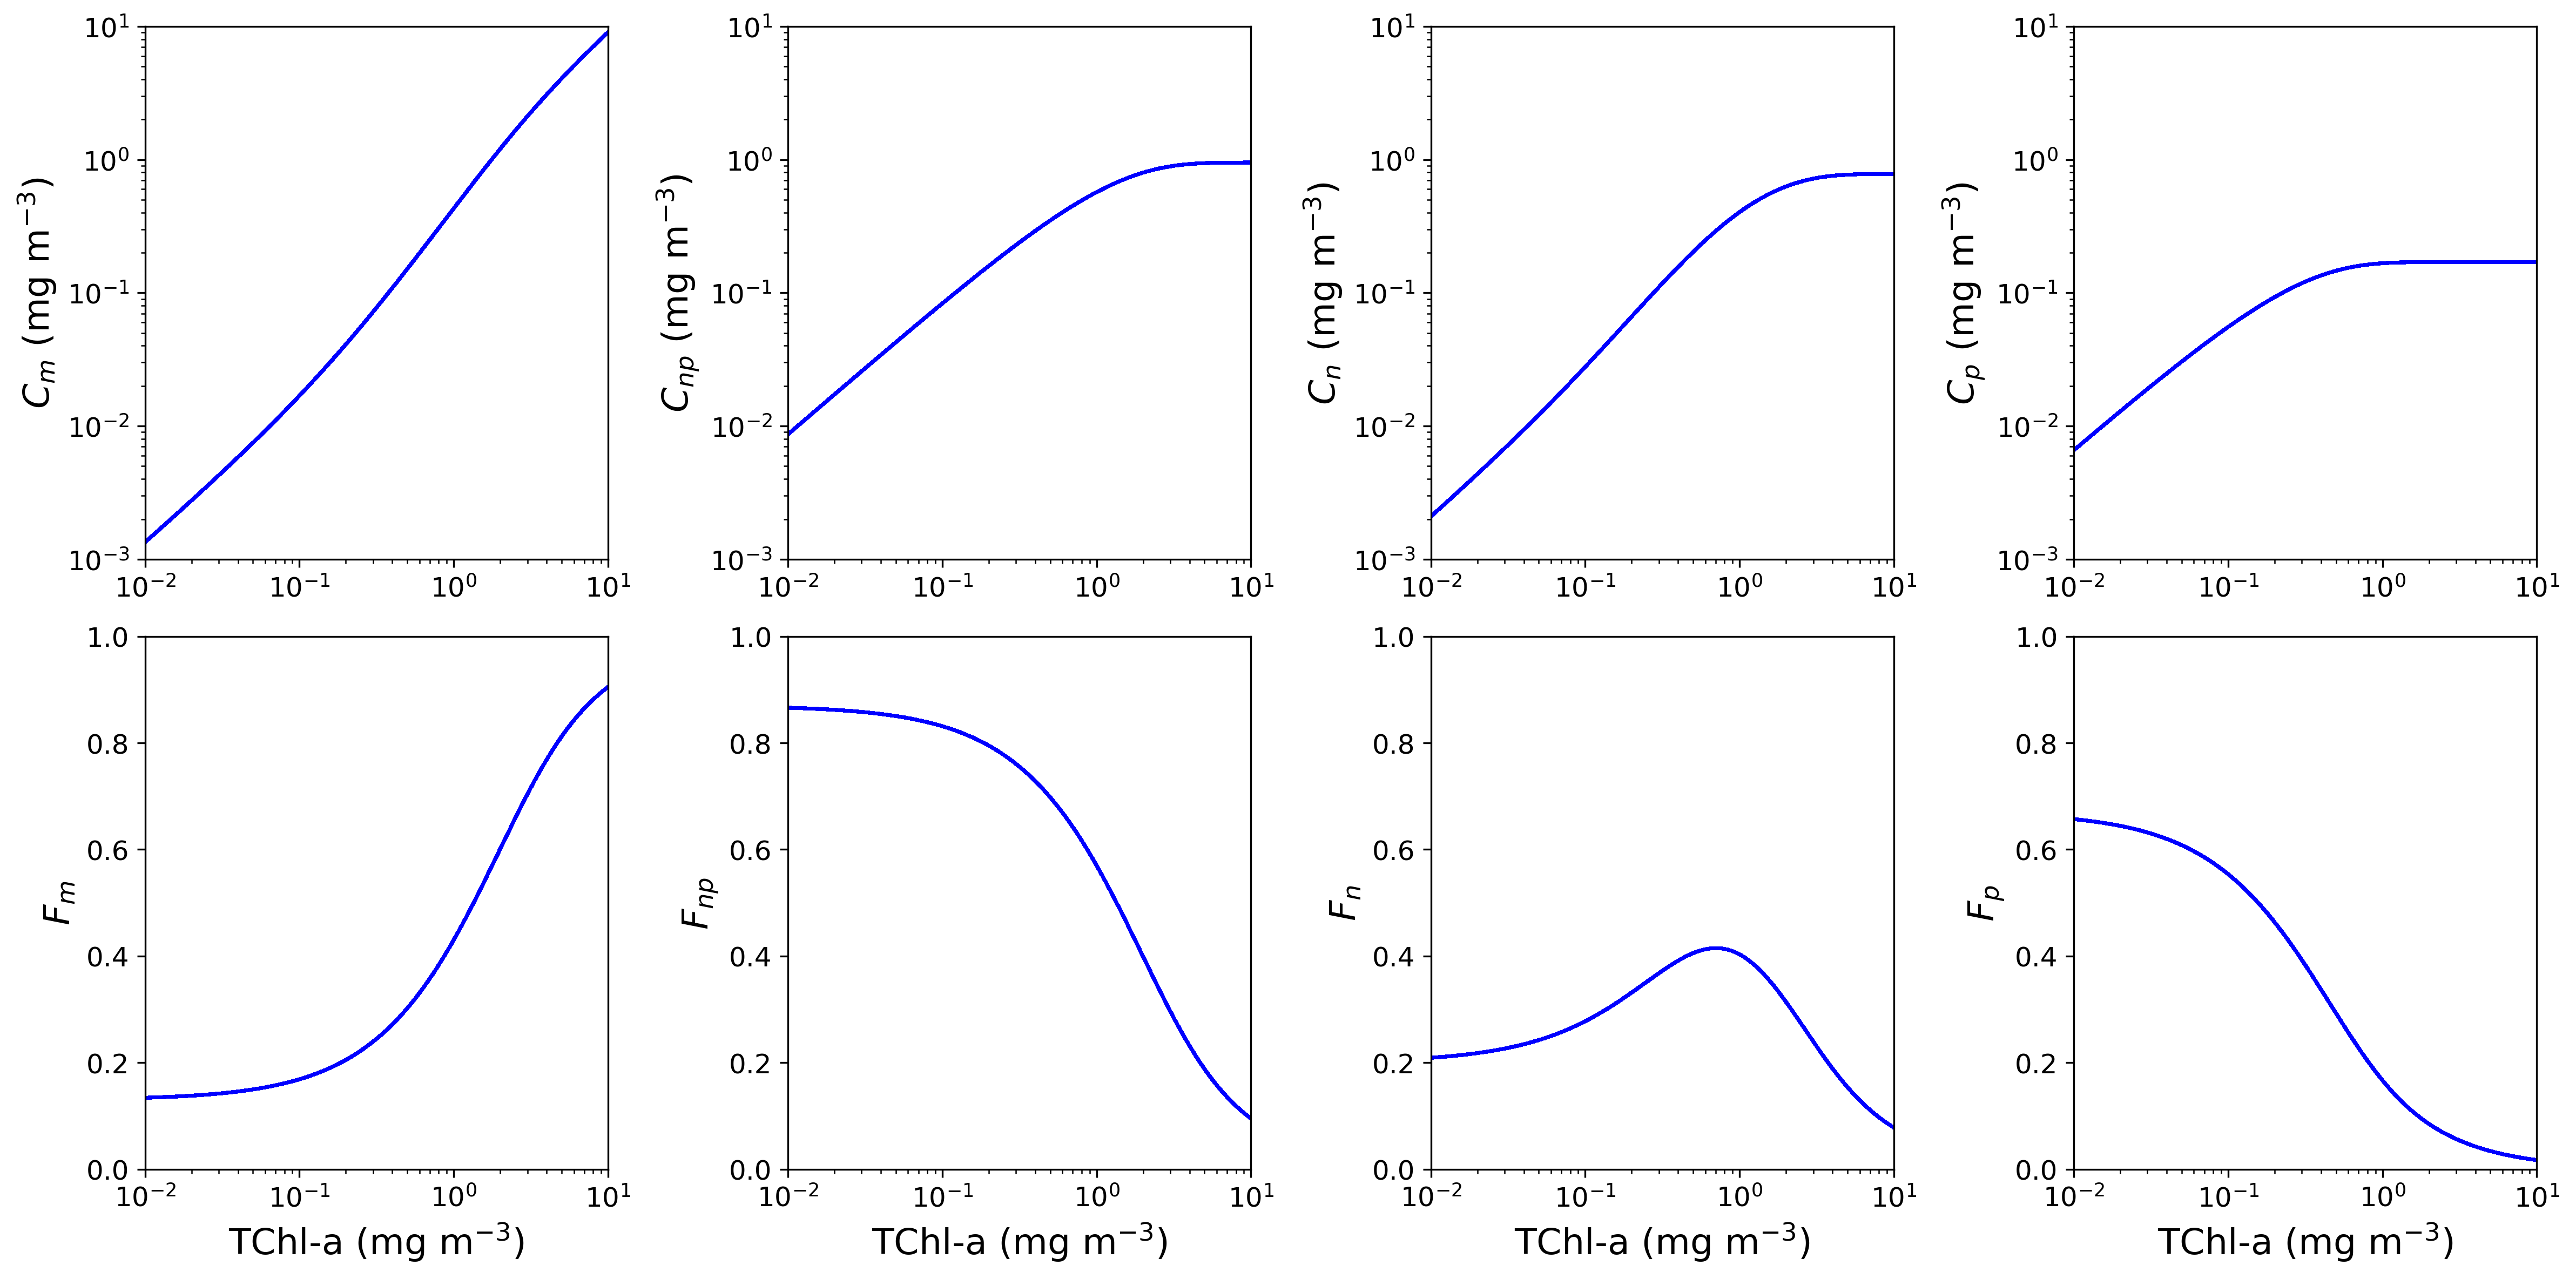

In [8]:
# SST-independent model (model_a)
fig, axes = plt.subplots(nrows=2,ncols=4,figsize=(16,8),dpi=300)

# Cm
axes[0,0].plot(chla, model_a_PSCs_Cm, 'b-')
axes[0,0].set_xscale('log')
axes[0,0].set_yscale('log')
axes[0,0].set_xlim([0.01, 10])
axes[0,0].set_ylim([0.001,10])
axes[0,0].xaxis.set_tick_params(labelsize=12)
axes[0,0].yaxis.set_tick_params(labelsize=12)
axes[0,0].set_ylabel('$C_{m}$'+' ($\mathregular{mg~m^{-3}}$)', fontsize = 16)
# Cnp
axes[0,1].plot(chla, model_a_PSCs_Cnp, 'b-')
axes[0,1].set_xscale('log')
axes[0,1].set_yscale('log')
axes[0,1].set_xlim([0.01, 10])
axes[0,1].set_ylim([0.001,10])
axes[0,1].xaxis.set_tick_params(labelsize=12)
axes[0,1].yaxis.set_tick_params(labelsize=12)
axes[0,1].set_ylabel('$C_{np}$'+' ($\mathregular{mg~m^{-3}}$)', fontsize = 16)
# Cn
axes[0,2].plot(chla, model_a_PSCs_Cn, 'b-')
axes[0,2].set_xscale('log')
axes[0,2].set_yscale('log')
axes[0,2].set_xlim([0.01, 10])
axes[0,2].set_ylim([0.001,10])
axes[0,2].xaxis.set_tick_params(labelsize=12)
axes[0,2].yaxis.set_tick_params(labelsize=12)
axes[0,2].set_ylabel('$C_{n}$'+' ($\mathregular{mg~m^{-3}}$)', fontsize = 16)
# Cp
axes[0,3].plot(chla, model_a_PSCs_Cp, 'b-')
axes[0,3].set_xscale('log')
axes[0,3].set_yscale('log')
axes[0,3].set_xlim([0.01, 10])
axes[0,3].set_ylim([0.001,10])
axes[0,3].xaxis.set_tick_params(labelsize=12)
axes[0,3].yaxis.set_tick_params(labelsize=12)
axes[0,3].set_ylabel('$C_{p}$'+' ($\mathregular{mg~m^{-3}}$)', fontsize = 16)

# Fm
axes[1,0].plot(chla, model_a_PSCs_Fm, 'b-')   
axes[1,0].set_xscale('log')
axes[1,0].set_xlim([0.01, 10])
axes[1,0].set_ylim([0,1])
axes[1,0].xaxis.set_tick_params(labelsize=12)
axes[1,0].yaxis.set_tick_params(labelsize=12)
axes[1,0].set_xlabel('TChl-a ($\mathregular{mg~m^{-3}}$)', fontsize = 16)
axes[1,0].set_ylabel('$F_{m}$', fontsize = 16)
# Fnp
axes[1,1].plot(chla, model_a_PSCs_Fnp, 'b-')  
axes[1,1].set_xscale('log')
axes[1,1].set_xlim([0.01, 10])
axes[1,1].set_ylim([0,1])
axes[1,1].xaxis.set_tick_params(labelsize=12)
axes[1,1].yaxis.set_tick_params(labelsize=12)
axes[1,1].set_xlabel('TChl-a ($\mathregular{mg~m^{-3}}$)', fontsize = 16)
axes[1,1].set_ylabel('$F_{np}$', fontsize = 16)
# Fn
axes[1,2].plot(chla, model_a_PSCs_Fn, 'b-')  
axes[1,2].set_xscale('log')
axes[1,2].set_xlim([0.01, 10])
axes[1,2].set_ylim([0,1])
axes[1,2].xaxis.set_tick_params(labelsize=12)
axes[1,2].yaxis.set_tick_params(labelsize=12)
axes[1,2].set_xlabel('TChl-a ($\mathregular{mg~m^{-3}}$)', fontsize = 16)
axes[1,2].set_ylabel('$F_{n}$', fontsize = 16)
# Fp
axes[1,3].plot(chla, model_a_PSCs_Fp, 'b-')  
axes[1,3].set_xscale('log')
axes[1,3].set_xlim([0.01, 10])
axes[1,3].set_ylim([0,1])
axes[1,3].xaxis.set_tick_params(labelsize=12)
axes[1,3].yaxis.set_tick_params(labelsize=12)
axes[1,3].set_xlabel('TChl-a ($\mathregular{mg~m^{-3}}$)', fontsize = 16)
axes[1,3].set_ylabel('$F_{p}$', fontsize = 16)

fig.tight_layout()

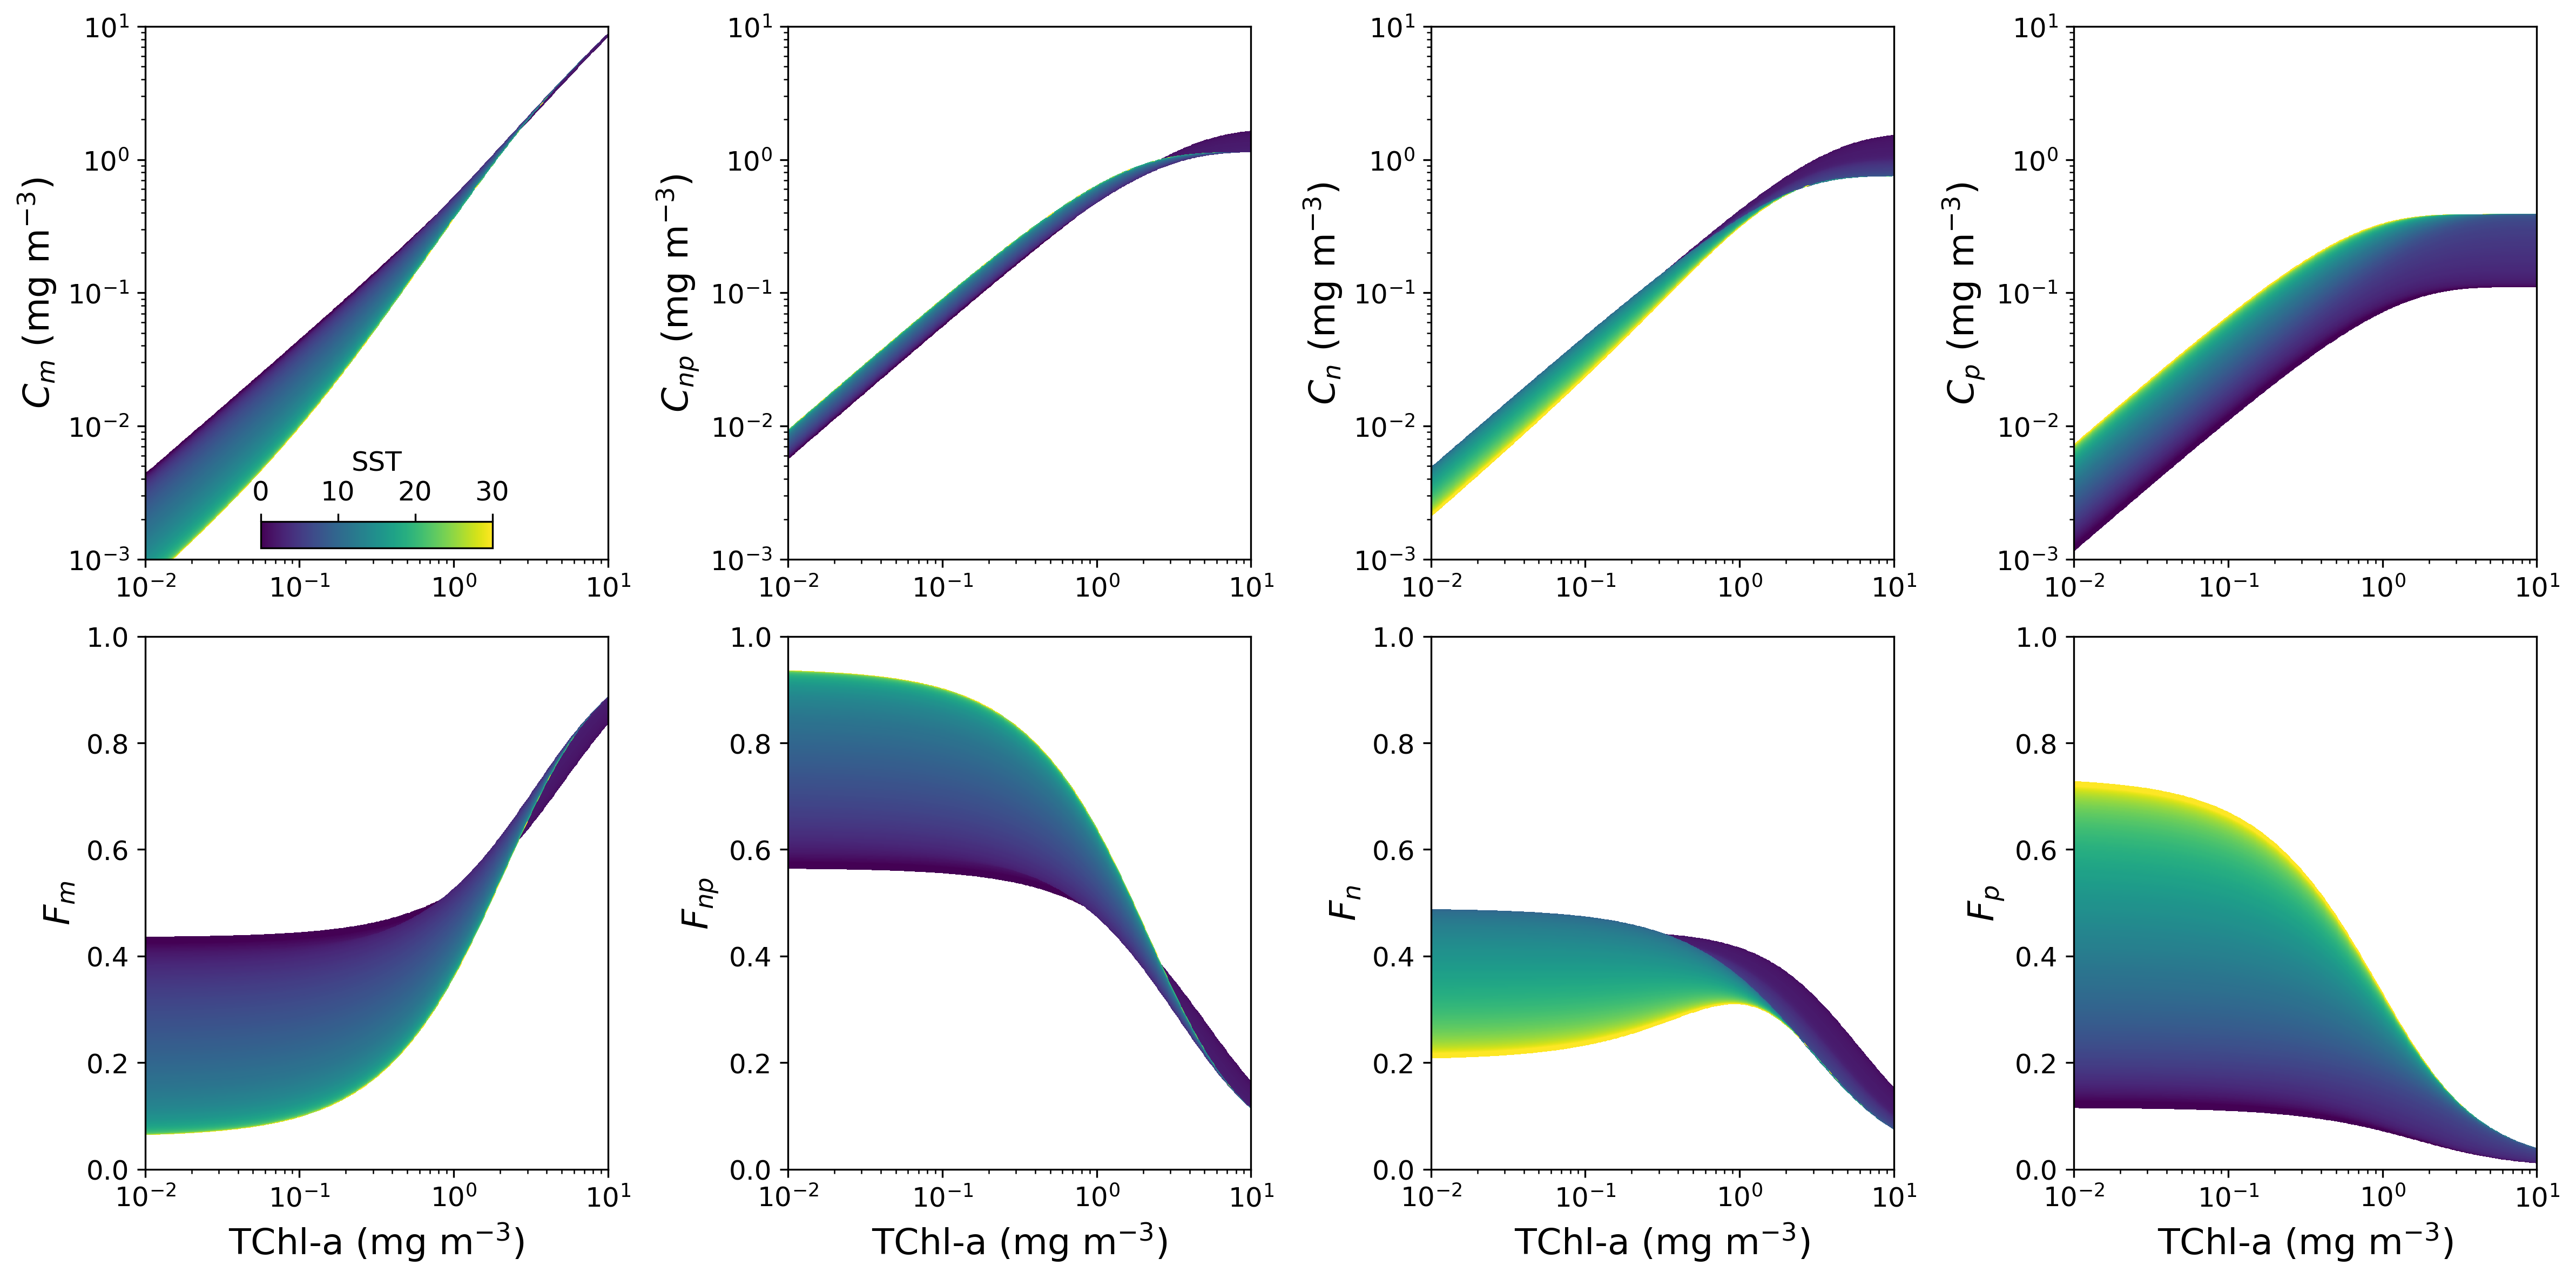

In [9]:
# 16-parameter SST-dependent model (model_b)
fig, axes = plt.subplots(nrows=2,ncols=4,figsize=(16,8),dpi=300)
cmap_sst = 'viridis'
norm_sst = mpl.colors.Normalize(vmin=0, vmax=30)

sst_pcolor = np.matlib.repmat(sst,np.size(chla),1)
sst_pcolor = np.delete(sst_pcolor, -1, axis=0) # delete last row
sst_pcolor = np.delete(sst_pcolor, -1, axis=1) # delete last column
chla_pcolor = np.matlib.repmat(chla,np.size(sst),1).T

# Cm
axes[0,0].pcolormesh(chla_pcolor, model_b_PSCs_Cm, sst_pcolor, cmap=cmap_sst, norm=norm_sst)
axes[0,0].set_xscale('log')
axes[0,0].set_yscale('log')
axes[0,0].set_xlim([0.01, 10])
axes[0,0].set_ylim([0.001,10])
axes[0,0].xaxis.set_tick_params(labelsize=12)
axes[0,0].yaxis.set_tick_params(labelsize=12)
# axes[0,0].set_xlabel('TChl-a ($\mathregular{mg~m^{-3}}$)', fontsize = 16)
axes[0,0].set_ylabel('$C_{m}$'+' ($\mathregular{mg~m^{-3}}$)', fontsize = 16)
# Cnp
axes[0,1].pcolormesh(chla_pcolor, model_b_PSCs_Cnp, sst_pcolor, cmap=cmap_sst, norm=norm_sst)
axes[0,1].set_xscale('log')
axes[0,1].set_yscale('log')
axes[0,1].set_xlim([0.01, 10])
axes[0,1].set_ylim([0.001,10])
axes[0,1].xaxis.set_tick_params(labelsize=12)
axes[0,1].yaxis.set_tick_params(labelsize=12)
# axes[0,1].set_xlabel('TChl-a ($\mathregular{mg~m^{-3}}$)', fontsize = 16)
axes[0,1].set_ylabel('$C_{np}$'+' ($\mathregular{mg~m^{-3}}$)', fontsize = 16)
# Cn
axes[0,2].pcolormesh(chla_pcolor, model_b_PSCs_Cn, sst_pcolor, cmap=cmap_sst, norm=norm_sst)
axes[0,2].set_xscale('log')
axes[0,2].set_yscale('log')
axes[0,2].set_xlim([0.01, 10])
axes[0,2].set_ylim([0.001,10])
axes[0,2].xaxis.set_tick_params(labelsize=12)
axes[0,2].yaxis.set_tick_params(labelsize=12)
# axes[0,2].set_xlabel('TChl-a ($\mathregular{mg~m^{-3}}$)', fontsize = 16)
axes[0,2].set_ylabel('$C_{n}$'+' ($\mathregular{mg~m^{-3}}$)', fontsize = 16)
# Cp
axes[0,3].pcolormesh(chla_pcolor, model_b_PSCs_Cp, sst_pcolor, cmap=cmap_sst, norm=norm_sst)
axes[0,3].set_xscale('log')
axes[0,3].set_yscale('log')
axes[0,3].set_xlim([0.01, 10])
axes[0,3].set_ylim([0.001,10])
axes[0,3].xaxis.set_tick_params(labelsize=12)
axes[0,3].yaxis.set_tick_params(labelsize=12)
# axes[0,3].set_xlabel('TChl-a ($\mathregular{mg~m^{-3}}$)', fontsize = 16)
axes[0,3].set_ylabel('$C_{p}$'+' ($\mathregular{mg~m^{-3}}$)', fontsize = 16)

# Fm
axes[1,0].pcolormesh(chla_pcolor, model_b_PSCs_Fm, sst_pcolor, cmap=cmap_sst, norm=norm_sst)
axes[1,0].set_xscale('log')
axes[1,0].set_xlim([0.01, 10])
axes[1,0].set_ylim([0,1])
axes[1,0].xaxis.set_tick_params(labelsize=12)
axes[1,0].yaxis.set_tick_params(labelsize=12)
axes[1,0].set_xlabel('TChl-a ($\mathregular{mg~m^{-3}}$)', fontsize = 16)
axes[1,0].set_ylabel('$F_{m}$', fontsize = 16)
# Fnp
axes[1,1].pcolormesh(chla_pcolor, model_b_PSCs_Fnp, sst_pcolor, cmap=cmap_sst, norm=norm_sst)
axes[1,1].set_xscale('log')
axes[1,1].set_xlim([0.01, 10])
axes[1,1].set_ylim([0,1])
axes[1,1].xaxis.set_tick_params(labelsize=12)
axes[1,1].yaxis.set_tick_params(labelsize=12)
axes[1,1].set_xlabel('TChl-a ($\mathregular{mg~m^{-3}}$)', fontsize = 16)
axes[1,1].set_ylabel('$F_{np}$', fontsize = 16)
# Fn
axes[1,2].pcolormesh(chla_pcolor, model_b_PSCs_Fn, sst_pcolor, cmap=cmap_sst, norm=norm_sst)
axes[1,2].set_xscale('log')
axes[1,2].set_xlim([0.01, 10])
axes[1,2].set_ylim([0,1])
axes[1,2].xaxis.set_tick_params(labelsize=12)
axes[1,2].yaxis.set_tick_params(labelsize=12)
axes[1,2].set_xlabel('TChl-a ($\mathregular{mg~m^{-3}}$)', fontsize = 16)
axes[1,2].set_ylabel('$F_{n}$', fontsize = 16)
# Fp
axes[1,3].pcolormesh(chla_pcolor, model_b_PSCs_Fp, sst_pcolor, cmap=cmap_sst, norm=norm_sst)
axes[1,3].set_xscale('log')
axes[1,3].set_xlim([0.01, 10])
axes[1,3].set_ylim([0,1])
axes[1,3].xaxis.set_tick_params(labelsize=12)
axes[1,3].yaxis.set_tick_params(labelsize=12)
axes[1,3].set_xlabel('TChl-a ($\mathregular{mg~m^{-3}}$)', fontsize = 16)
axes[1,3].set_ylabel('$F_{p}$', fontsize = 16)

axins = inset_axes(axes[0,0],
                    width="50%",  # width = 50% of parent_bbox width
                    height="5%",  # height : 5%
                    loc='lower center')

cb = fig.colorbar(mpl.cm.ScalarMappable(norm=norm_sst, cmap=cmap_sst), cax=axins, orientation='horizontal',ticks = [0,10,20,30])
cb.ax.set_xticklabels(['0','10','20','30']) 
cb.set_label(label='SST', size=12)
cb.ax.xaxis.set_ticks_position('top')
cb.ax.xaxis.set_label_position('top')
cb.ax.tick_params(labelsize=12)

fig.tight_layout()

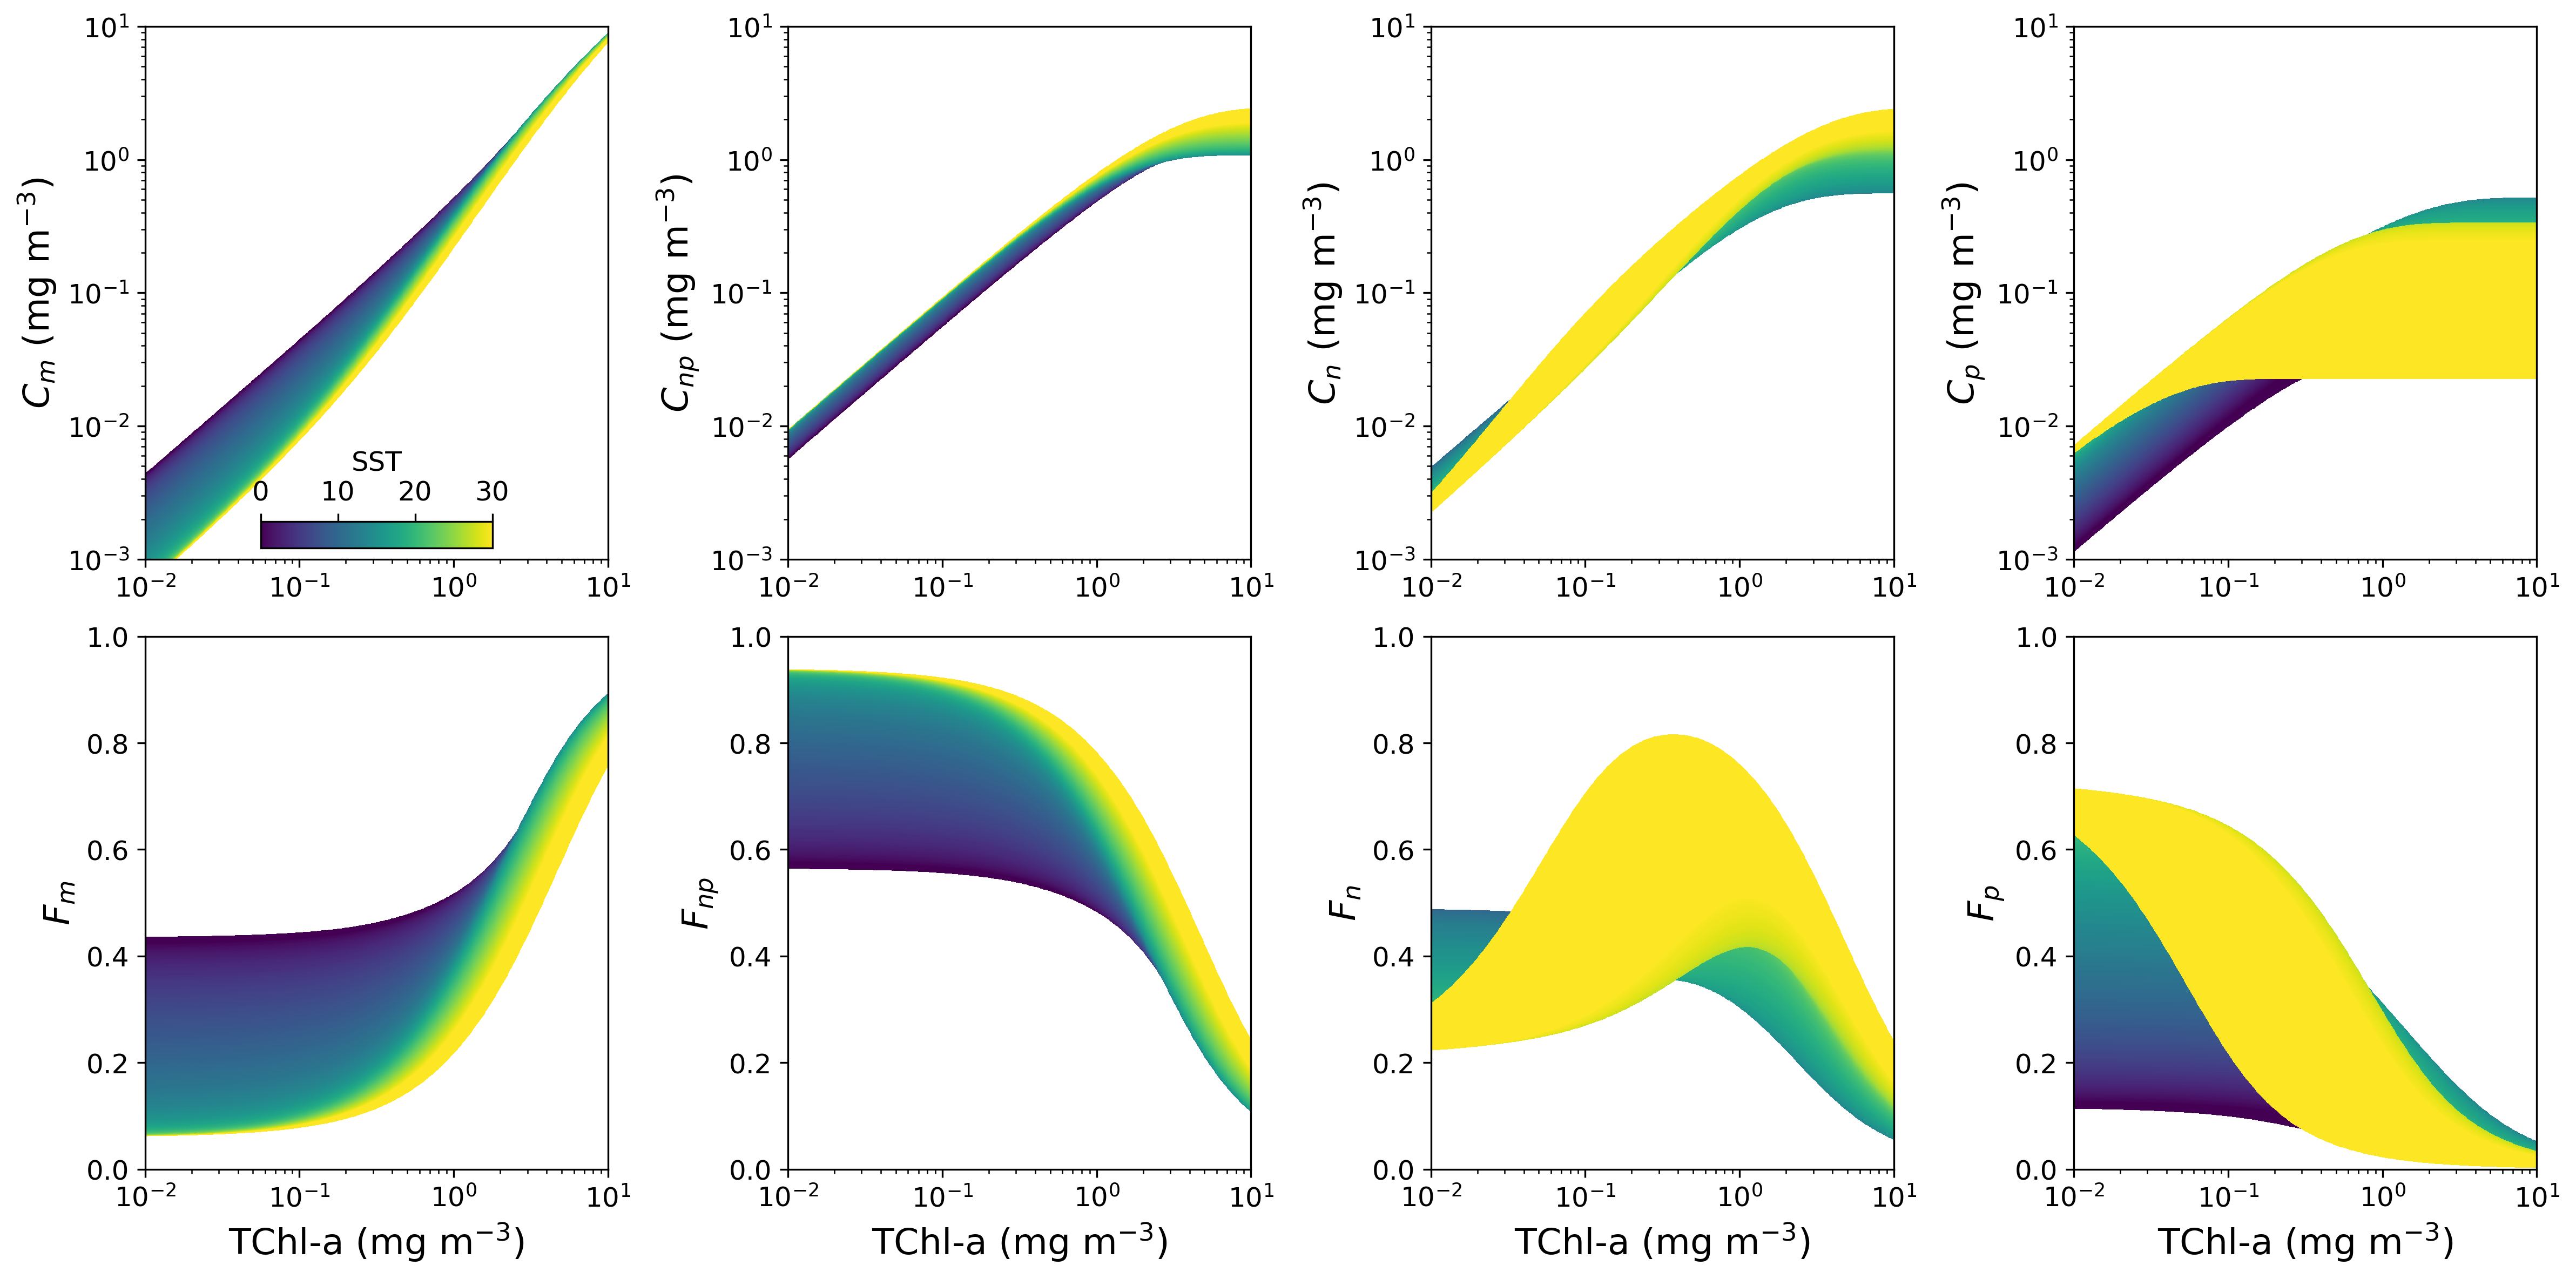

In [10]:
# 17-parameter SST-dependent model (model_c)
fig, axes = plt.subplots(nrows=2,ncols=4,figsize=(16,8),dpi=300)
cmap_sst = 'viridis'
norm_sst = mpl.colors.Normalize(vmin=0, vmax=30)

sst_pcolor = np.matlib.repmat(sst,np.size(chla),1)
sst_pcolor = np.delete(sst_pcolor, -1, axis=0) # delete last row
sst_pcolor = np.delete(sst_pcolor, -1, axis=1) # delete last column
chla_pcolor = np.matlib.repmat(chla,np.size(sst),1).T

# Cm
axes[0,0].pcolormesh(chla_pcolor, model_c_PSCs_Cm, sst_pcolor, cmap=cmap_sst, norm=norm_sst)
axes[0,0].set_xscale('log')
axes[0,0].set_yscale('log')
axes[0,0].set_xlim([0.01, 10])
axes[0,0].set_ylim([0.001,10])
axes[0,0].xaxis.set_tick_params(labelsize=12)
axes[0,0].yaxis.set_tick_params(labelsize=12)
# axes[0,0].set_xlabel('TChl-a ($\mathregular{mg~m^{-3}}$)', fontsize = 16)
axes[0,0].set_ylabel('$C_{m}$'+' ($\mathregular{mg~m^{-3}}$)', fontsize = 16)
# Cnp
axes[0,1].pcolormesh(chla_pcolor, model_c_PSCs_Cnp, sst_pcolor, cmap=cmap_sst, norm=norm_sst)
axes[0,1].set_xscale('log')
axes[0,1].set_yscale('log')
axes[0,1].set_xlim([0.01, 10])
axes[0,1].set_ylim([0.001,10])
axes[0,1].xaxis.set_tick_params(labelsize=12)
axes[0,1].yaxis.set_tick_params(labelsize=12)
# axes[0,1].set_xlabel('TChl-a ($\mathregular{mg~m^{-3}}$)', fontsize = 16)
axes[0,1].set_ylabel('$C_{np}$'+' ($\mathregular{mg~m^{-3}}$)', fontsize = 16)
# Cn
axes[0,2].pcolormesh(chla_pcolor, model_c_PSCs_Cn, sst_pcolor, cmap=cmap_sst, norm=norm_sst)
axes[0,2].set_xscale('log')
axes[0,2].set_yscale('log')
axes[0,2].set_xlim([0.01, 10])
axes[0,2].set_ylim([0.001,10])
axes[0,2].xaxis.set_tick_params(labelsize=12)
axes[0,2].yaxis.set_tick_params(labelsize=12)
# axes[0,2].set_xlabel('TChl-a ($\mathregular{mg~m^{-3}}$)', fontsize = 16)
axes[0,2].set_ylabel('$C_{n}$'+' ($\mathregular{mg~m^{-3}}$)', fontsize = 16)
# Cp
axes[0,3].pcolormesh(chla_pcolor, model_c_PSCs_Cp, sst_pcolor, cmap=cmap_sst, norm=norm_sst)
axes[0,3].set_xscale('log')
axes[0,3].set_yscale('log')
axes[0,3].set_xlim([0.01, 10])
axes[0,3].set_ylim([0.001,10])
axes[0,3].xaxis.set_tick_params(labelsize=12)
axes[0,3].yaxis.set_tick_params(labelsize=12)
# axes[0,3].set_xlabel('TChl-a ($\mathregular{mg~m^{-3}}$)', fontsize = 16)
axes[0,3].set_ylabel('$C_{p}$'+' ($\mathregular{mg~m^{-3}}$)', fontsize = 16)

# Fm
axes[1,0].pcolormesh(chla_pcolor, model_c_PSCs_Fm, sst_pcolor, cmap=cmap_sst, norm=norm_sst)
axes[1,0].set_xscale('log')
axes[1,0].set_xlim([0.01, 10])
axes[1,0].set_ylim([0,1])
axes[1,0].xaxis.set_tick_params(labelsize=12)
axes[1,0].yaxis.set_tick_params(labelsize=12)
axes[1,0].set_xlabel('TChl-a ($\mathregular{mg~m^{-3}}$)', fontsize = 16)
axes[1,0].set_ylabel('$F_{m}$', fontsize = 16)
# Fnp
axes[1,1].pcolormesh(chla_pcolor, model_c_PSCs_Fnp, sst_pcolor, cmap=cmap_sst, norm=norm_sst)
axes[1,1].set_xscale('log')
axes[1,1].set_xlim([0.01, 10])
axes[1,1].set_ylim([0,1])
axes[1,1].xaxis.set_tick_params(labelsize=12)
axes[1,1].yaxis.set_tick_params(labelsize=12)
axes[1,1].set_xlabel('TChl-a ($\mathregular{mg~m^{-3}}$)', fontsize = 16)
axes[1,1].set_ylabel('$F_{np}$', fontsize = 16)
# Fn
axes[1,2].pcolormesh(chla_pcolor, model_c_PSCs_Fn, sst_pcolor, cmap=cmap_sst, norm=norm_sst)
axes[1,2].set_xscale('log')
axes[1,2].set_xlim([0.01, 10])
axes[1,2].set_ylim([0,1])
axes[1,2].xaxis.set_tick_params(labelsize=12)
axes[1,2].yaxis.set_tick_params(labelsize=12)
axes[1,2].set_xlabel('TChl-a ($\mathregular{mg~m^{-3}}$)', fontsize = 16)
axes[1,2].set_ylabel('$F_{n}$', fontsize = 16)
# Fp
axes[1,3].pcolormesh(chla_pcolor, model_c_PSCs_Fp, sst_pcolor, cmap=cmap_sst, norm=norm_sst)
axes[1,3].set_xscale('log')
axes[1,3].set_xlim([0.01, 10])
axes[1,3].set_ylim([0,1])
axes[1,3].xaxis.set_tick_params(labelsize=12)
axes[1,3].yaxis.set_tick_params(labelsize=12)
axes[1,3].set_xlabel('TChl-a ($\mathregular{mg~m^{-3}}$)', fontsize = 16)
axes[1,3].set_ylabel('$F_{p}$', fontsize = 16)

axins = inset_axes(axes[0,0],
                    width="50%",  # width = 50% of parent_bbox width
                    height="5%",  # height : 5%
                    loc='lower center')

cb = fig.colorbar(mpl.cm.ScalarMappable(norm=norm_sst, cmap=cmap_sst), cax=axins, orientation='horizontal',ticks = [0,10,20,30])
cb.ax.set_xticklabels(['0','10','20','30']) 
cb.set_label(label='SST', size=12)
cb.ax.xaxis.set_ticks_position('top')
cb.ax.xaxis.set_label_position('top')
cb.ax.tick_params(labelsize=12)

fig.tight_layout()

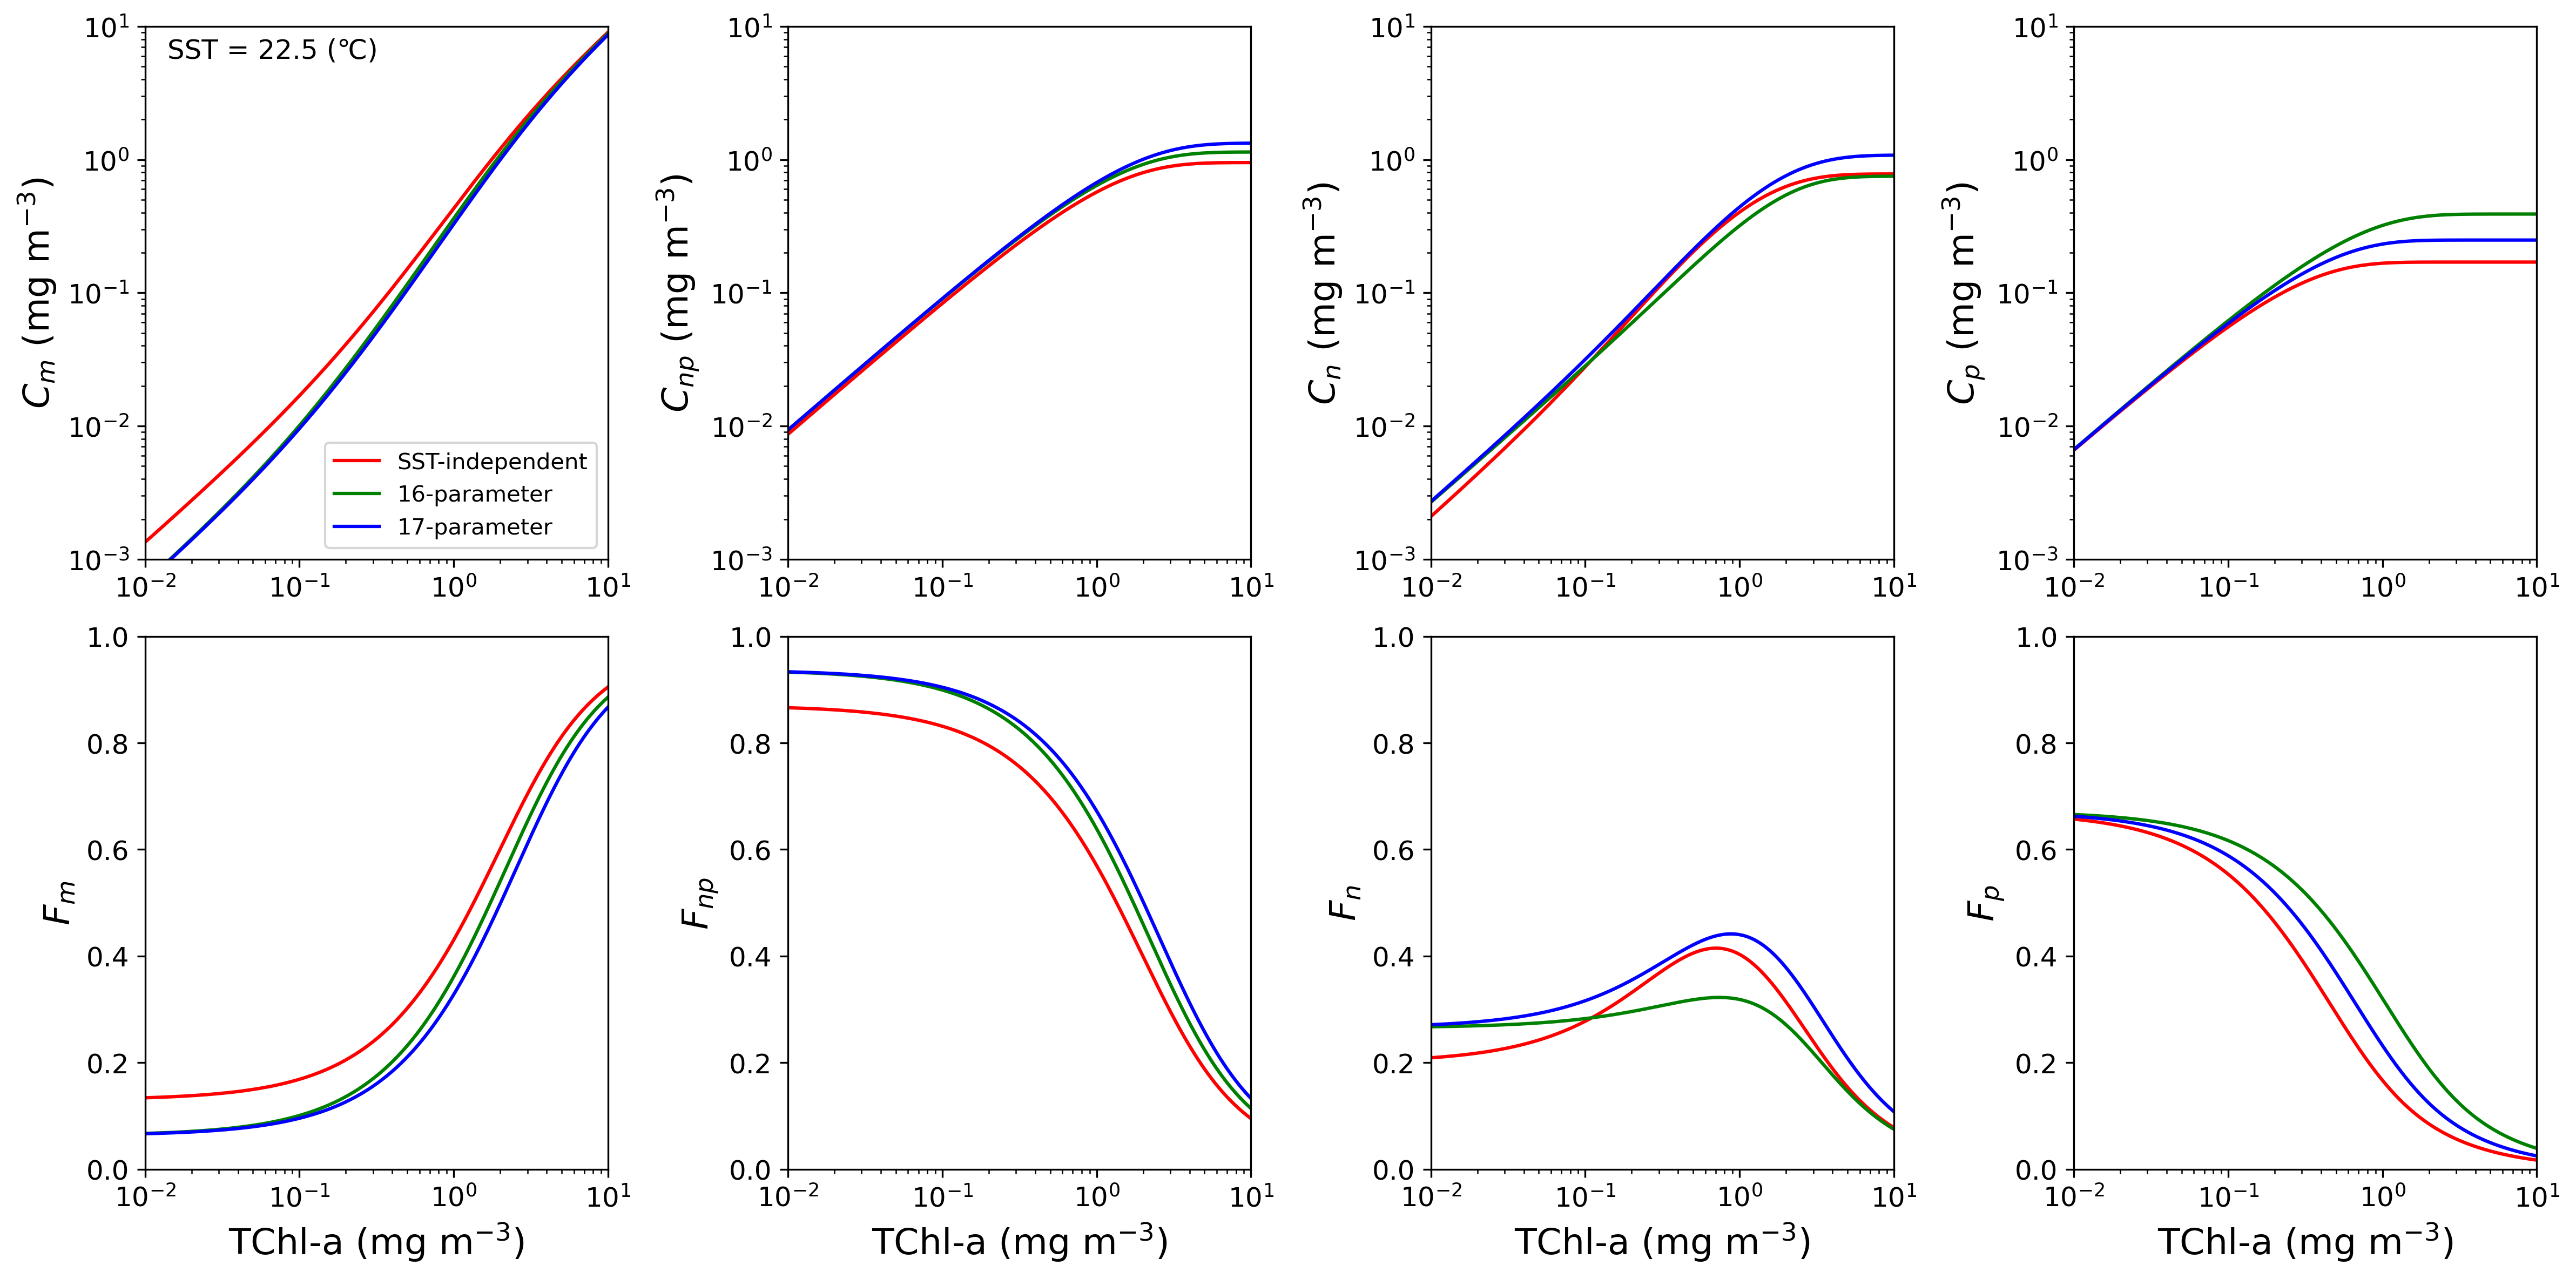

In [11]:
# comparison of model-derived results from three models by selecting certain SST
# e.g., SST = 0, 10, 20, and 30 celsius degree
sst_example = 22.5 # insert temperature here from -1.8 to 35 celsius degree
sst_index, = np.where(np.isclose(sst, sst_example))

fig, axes = plt.subplots(nrows=2,ncols=4,figsize=(16,8),dpi=300)
# Cm
axes[0,0].plot(chla, model_a_PSCs_Cm[:,sst_index], 'r-', label='SST-independent')
axes[0,0].plot(chla, model_b_PSCs_Cm[:,sst_index], 'g-', label='16-parameter')
axes[0,0].plot(chla, model_c_PSCs_Cm[:,sst_index], 'b-', label='17-parameter')
axes[0,0].set_xscale('log')
axes[0,0].set_yscale('log')
axes[0,0].set_xlim([0.01, 10])
axes[0,0].set_ylim([0.001,10])
axes[0,0].xaxis.set_tick_params(labelsize=12)
axes[0,0].yaxis.set_tick_params(labelsize=12)
axes[0,0].set_ylabel('$C_{m}$'+' ($\mathregular{mg~m^{-3}}$)', fontsize = 16)
# Cnp
axes[0,1].plot(chla, model_a_PSCs_Cnp[:,sst_index], 'r-', label='SST-independent')
axes[0,1].plot(chla, model_b_PSCs_Cnp[:,sst_index], 'g-', label='16-parameter')
axes[0,1].plot(chla, model_c_PSCs_Cnp[:,sst_index], 'b-', label='17-parameter')
axes[0,1].set_xscale('log')
axes[0,1].set_yscale('log')
axes[0,1].set_xlim([0.01, 10])
axes[0,1].set_ylim([0.001,10])
axes[0,1].xaxis.set_tick_params(labelsize=12)
axes[0,1].yaxis.set_tick_params(labelsize=12)
axes[0,1].set_ylabel('$C_{np}$'+' ($\mathregular{mg~m^{-3}}$)', fontsize = 16)
# Cn
axes[0,2].plot(chla, model_a_PSCs_Cn[:,sst_index], 'r-', label='SST-independent')
axes[0,2].plot(chla, model_b_PSCs_Cn[:,sst_index], 'g-', label='16-parameter')
axes[0,2].plot(chla, model_c_PSCs_Cn[:,sst_index], 'b-', label='17-parameter')
axes[0,2].set_xscale('log')
axes[0,2].set_yscale('log')
axes[0,2].set_xlim([0.01, 10])
axes[0,2].set_ylim([0.001,10])
axes[0,2].xaxis.set_tick_params(labelsize=12)
axes[0,2].yaxis.set_tick_params(labelsize=12)
axes[0,2].set_ylabel('$C_{n}$'+' ($\mathregular{mg~m^{-3}}$)', fontsize = 16)
# Cp
axes[0,3].plot(chla, model_a_PSCs_Cp[:,sst_index], 'r-', label='SST-independent')
axes[0,3].plot(chla, model_b_PSCs_Cp[:,sst_index], 'g-', label='16-parameter')
axes[0,3].plot(chla, model_c_PSCs_Cp[:,sst_index], 'b-', label='17-parameter')
axes[0,3].set_xscale('log')
axes[0,3].set_yscale('log')
axes[0,3].set_xlim([0.01, 10])
axes[0,3].set_ylim([0.001,10])
axes[0,3].xaxis.set_tick_params(labelsize=12)
axes[0,3].yaxis.set_tick_params(labelsize=12)
axes[0,3].set_ylabel('$C_{p}$'+' ($\mathregular{mg~m^{-3}}$)', fontsize = 16)

# Fm
axes[1,0].plot(chla, model_a_PSCs_Fm[:,sst_index], 'r-', label='SST-independent')
axes[1,0].plot(chla, model_b_PSCs_Fm[:,sst_index], 'g-', label='16-parameter')  
axes[1,0].plot(chla, model_c_PSCs_Fm[:,sst_index], 'b-', label='17-parameter')  
axes[1,0].set_xscale('log')
axes[1,0].set_xlim([0.01, 10])
axes[1,0].set_ylim([0,1])
axes[1,0].xaxis.set_tick_params(labelsize=12)
axes[1,0].yaxis.set_tick_params(labelsize=12)
axes[1,0].set_xlabel('TChl-a ($\mathregular{mg~m^{-3}}$)', fontsize = 16)
axes[1,0].set_ylabel('$F_{m}$', fontsize = 16)
# Fnp
axes[1,1].plot(chla, model_a_PSCs_Fnp[:,sst_index], 'r-', label='SST-independent')  
axes[1,1].plot(chla, model_b_PSCs_Fnp[:,sst_index], 'g-', label='16-parameter')  
axes[1,1].plot(chla, model_c_PSCs_Fnp[:,sst_index], 'b-', label='17-parameter')  
axes[1,1].set_xscale('log')
axes[1,1].set_xlim([0.01, 10])
axes[1,1].set_ylim([0,1])
axes[1,1].xaxis.set_tick_params(labelsize=12)
axes[1,1].yaxis.set_tick_params(labelsize=12)
axes[1,1].set_xlabel('TChl-a ($\mathregular{mg~m^{-3}}$)', fontsize = 16)
axes[1,1].set_ylabel('$F_{np}$', fontsize = 16)
# Fn
axes[1,2].plot(chla, model_a_PSCs_Fn[:,sst_index], 'r-', label='SST-independent')  
axes[1,2].plot(chla, model_b_PSCs_Fn[:,sst_index], 'g-', label='16-parameter')  
axes[1,2].plot(chla, model_c_PSCs_Fn[:,sst_index], 'b-', label='17-parameter')  
axes[1,2].set_xscale('log')
axes[1,2].set_xlim([0.01, 10])
axes[1,2].set_ylim([0,1])
axes[1,2].xaxis.set_tick_params(labelsize=12)
axes[1,2].yaxis.set_tick_params(labelsize=12)
axes[1,2].set_xlabel('TChl-a ($\mathregular{mg~m^{-3}}$)', fontsize = 16)
axes[1,2].set_ylabel('$F_{n}$', fontsize = 16)
# Fp
axes[1,3].plot(chla, model_a_PSCs_Fp[:,sst_index], 'r-', label='SST-independent')  
axes[1,3].plot(chla, model_b_PSCs_Fp[:,sst_index], 'g-', label='16-parameter') 
axes[1,3].plot(chla, model_c_PSCs_Fp[:,sst_index], 'b-', label='17-parameter') 
axes[1,3].set_xscale('log')
axes[1,3].set_xlim([0.01, 10])
axes[1,3].set_ylim([0,1])
axes[1,3].xaxis.set_tick_params(labelsize=12)
axes[1,3].yaxis.set_tick_params(labelsize=12)
axes[1,3].set_xlabel('TChl-a ($\mathregular{mg~m^{-3}}$)', fontsize = 16)
axes[1,3].set_ylabel('$F_{p}$', fontsize = 16)

axes[0,0].legend(fontsize = 10, loc='lower right')
text = 'SST = '+ str(sst_example) +' (℃)'
axes[0,0].annotate(text, xy=(0, 1), xycoords='axes fraction', fontsize=12,
                xytext=(10, -5), textcoords='offset points',
                ha='left', va='top')


fig.tight_layout()